In [1]:
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
dfHd = pd.read_csv('Heart Disease/heart_disease.csv')
dfHd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dfHd.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
X.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
dtype: int64

#### the data looks to be clean and ready for our use!

### Target: Heart Disease? (1=yes, 0=no)

In [4]:
# Define
y = dfHd.loc[:,'target']
X = dfHd.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Let's try some basic models to predict heart disease

In [24]:
# Build basic decision tree for comparison
from sklearn.tree import DecisionTreeRegressor

def build_score_DecisionTree(X_trn, X_tst, y_trn, y_tst):
    
    mdlDtrHd = DecisionTreeRegressor(random_state=1, max_depth=10)
    mdlDtrHd.fit(X_trn, y_trn)
    y_tst_pred = mdlDtrHd.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_pred)
    
    
    return (mae)

In [25]:
build_score_DecisionTree(X_train, X_test, y_train, y_test)

0.3114754098360656

### what does MAE mean in this case?

### Seems to act like a 'confidence level'

#### our model will predict with an average confidence of 69%

In [28]:
# Build random forest
from sklearn.ensemble import RandomForestRegressor

def build_score_RandomForest(X_trn, X_tst, y_trn, y_tst):
    
    mdlRfsHd = RandomForestRegressor(random_state=1, n_estimators=5000, max_depth=100)
    mdlRfsHd.fit(X_trn, y_trn)
    y_tst_pred = mdlRfsHd.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_pred)
    
    
    return (mae)

In [29]:
build_score_RandomForest(X_train, X_test, y_train, y_test)

0.30362950819672124

In [38]:
# Build grad. boost tree
from sklearn.ensemble import GradientBoostingRegressor 

def build_score_BoostedTree(X_trn, X_tst, y_trn, y_tst):
    
    mdlGbtHd = GradientBoostingRegressor(random_state=1, n_estimators=10000, learning_rate=0.01, max_depth=100)
    mdlGbtHd.fit(X_trn, y_trn)
    y_tst_pred = mdlGbtHd.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_pred)
    
    
    return (mae)

In [39]:
build_score_BoostedTree(X_train, X_test, y_train, y_test)

0.28062216947501606

#### When max_depth=5 grad. boosted tree was worst model, increasing max_depth made it much better!

#### Seems to be a limit at around 0.28 for grad. boosted tree for changing parameters

(0.0, 30.0)

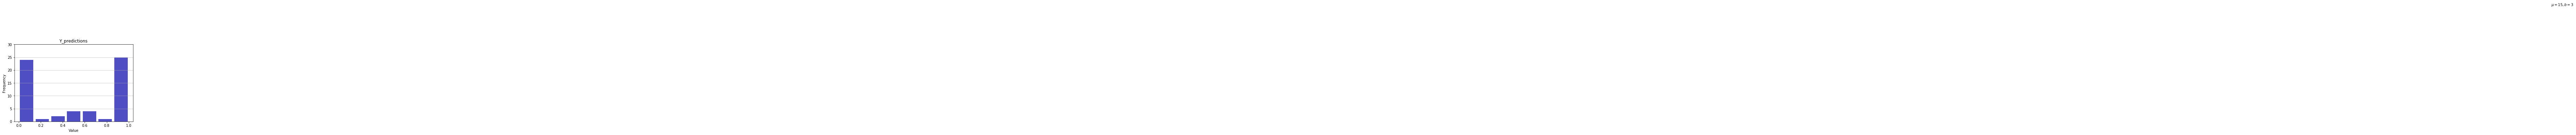

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Create histogram to visualize how our model is predicting
n, bins, patches = plt.hist(x=y_test_pred, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Y_predictions')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### This histogram visualizes how our model is predicting heart disease.

### It seems that it is fairly sure someone has/doesn't have heart disease for most cases, but not all... telling someone that we predict you have 0.5 heart disease isn't helpful

## Build a logistic regression model (used for binary targets)

In [57]:
from sklearn.linear_model import LogisticRegression

mdlLrHd = LogisticRegression(random_state=1, solver='lbfgs')
mdlLrHd.fit(X_train, y_train)
y_test_pred = mdlLrHd.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
mae

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.22950819672131148

(0.0, 40.0)

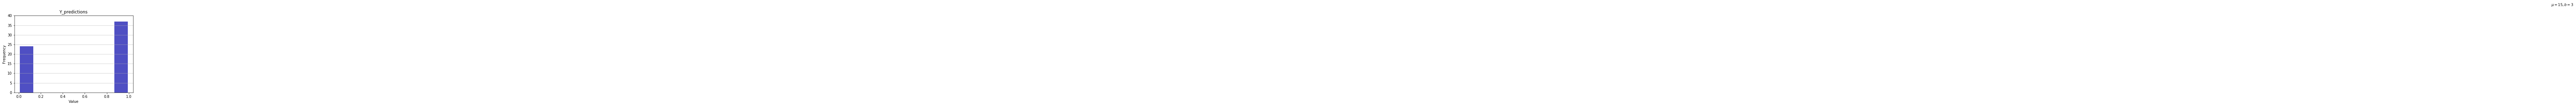

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Create histogram to visualize how our model is predicting
n, bins, patches = plt.hist(x=y_test_pred, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Y_predictions')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#### This simple model already improved the score compared to the decision tree approaches by eliminating the 'middle' values

### We also now have meaningful predictions to tell patients (1 or 0), not 0.5